# Intro to Plotly Express 

Plotly Express is the easy-to-use, high-level interface to Plotly, which operates on a variety of types of data and produces easy-to-style figures.

Plotly Express provides functions to visualize a variety of types of data. Most functions such as px.bar or px.scatter expect to operate on column-oriented data of the type you might store in a Pandas DataFrame (in either "long" or "wide" format, see below). px.imshow operates on matrix-like data you might store in a numpy or xarray array and functions like px.choropleth and px.choropleth_mapbox can operate on geographic data of the kind you might store in a GeoPandas GeoDataFrame. This page details how to provide column-oriented data to most Plotly Express functions.

## Read more

* Plotly tutorial https://plotly.com/python/plotly-express/

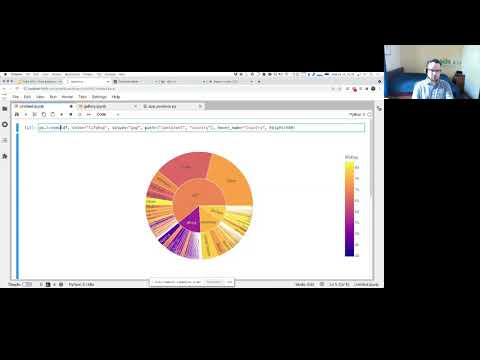

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('FpCgG85g2Hw')

## Visuals

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import plotly_express as px

In [4]:
ad_recs_annotated = pd.read_csv('../data/ad_annotations.csv')
ad_recs_annotated.sample(5)

week_id       ad_id               requester region is_success  \
37427   2021-week_35  AD0799NCP8  Search Million Culture     IN        yes   
58603   2021-week_37  AD088880DP    iDreamsky Technology     DE        yes   
60089   2021-week_37  AD00A89RZI   MoJoe Brewing Company     GB         no   
3526    2021-week_33  AD07C8XPLQ   MoJoe Brewing Company     GB        yes   
171976  2021-week_44  AD09H6MS7K              Extreme DA     US        yes   

       is_sever recommendation_type rec_provider  
37427       NaN              Qality      ManualQ  
58603       NaN              Qality     UserPopQ  
60089     False               Yield     UserPopY  
3526        NaN               Yield         DNNY  
171976      NaN               Yield   RuleBasedY

## Helper functions

## Line chart

To demonstrate the line graph on our data, let's start by writing a function that compute the success rate and success rate CI given a dataframe:

In [5]:
from src.helpers import calc_success_rate

In [6]:
succes_rate_per_week = ad_recs_annotated.groupby(['week_id']).apply(calc_success_rate)
succes_rate_per_week = succes_rate_per_week.reset_index().sort_values(by='week_id')
succes_rate_per_week.head()

week_id  success_rate  success_rate_ci
0  2021-week_33      0.809000         0.040450
1  2021-week_34      0.808294         0.040415
2  2021-week_35      0.816044         0.040802
3  2021-week_36      0.814107         0.040705
4  2021-week_37      0.813230         0.040661

### Simple line chart

We will use plotly express `line()` API to plot line graphs. To use a line graph, Just supply the dataframe, the column to be used as the x axis and the column to be used as the y axis:

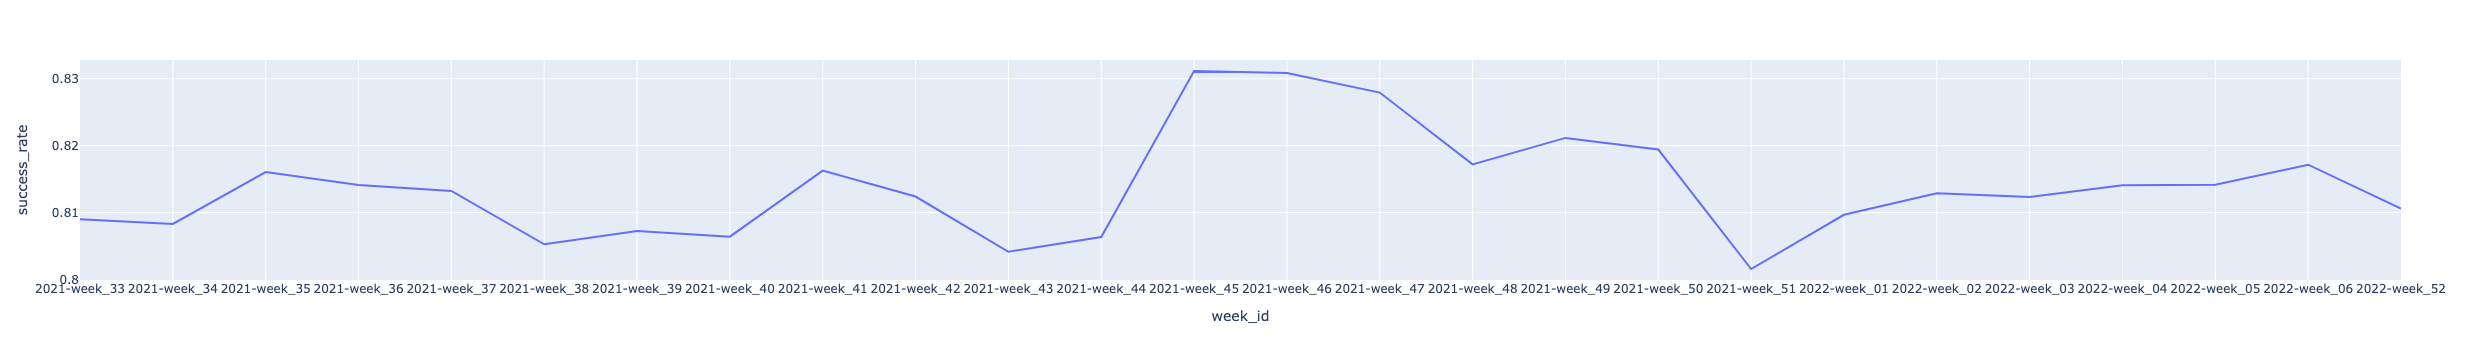

In [7]:
px.line(succes_rate_per_week, x='week_id',y='success_rate')

### Line chart with error bars

Same, we just need to give the error column:

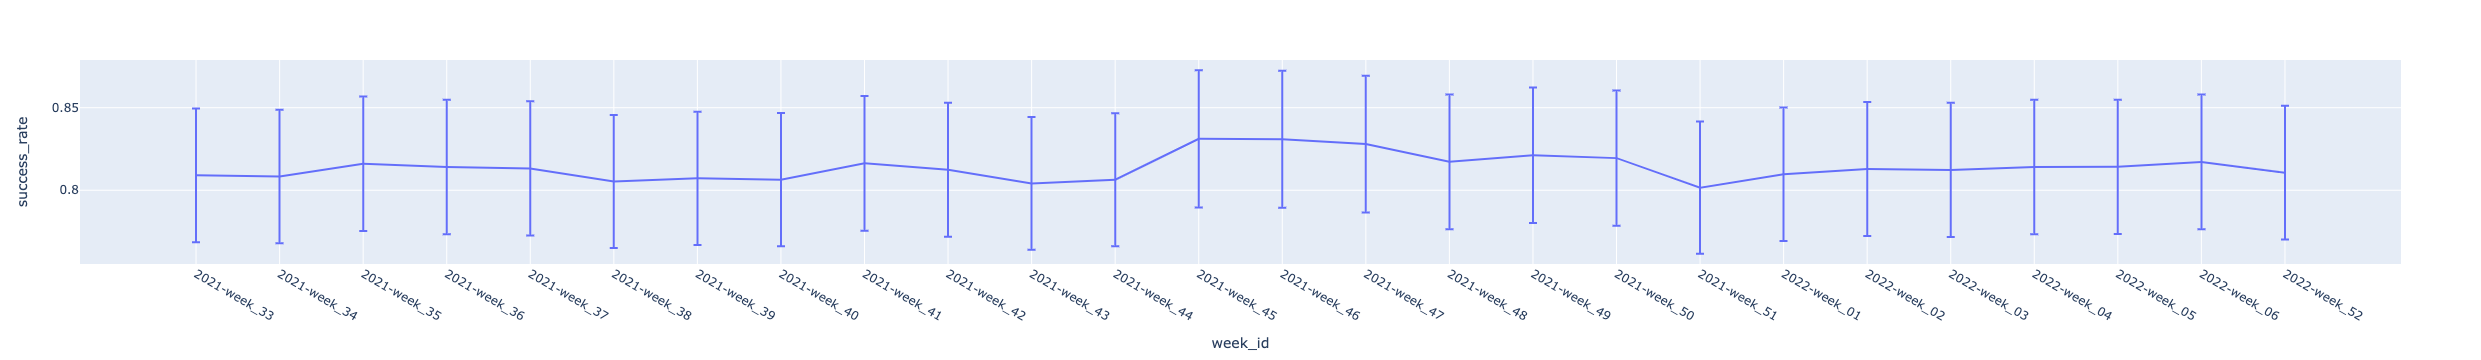

In [8]:
px.line(succes_rate_per_week, x='week_id',y='success_rate', error_y='success_rate_ci')

If we want to fix the axes to same range, we can use `range_x` and `range_y`, we can also add title, and other types of graph modifications:

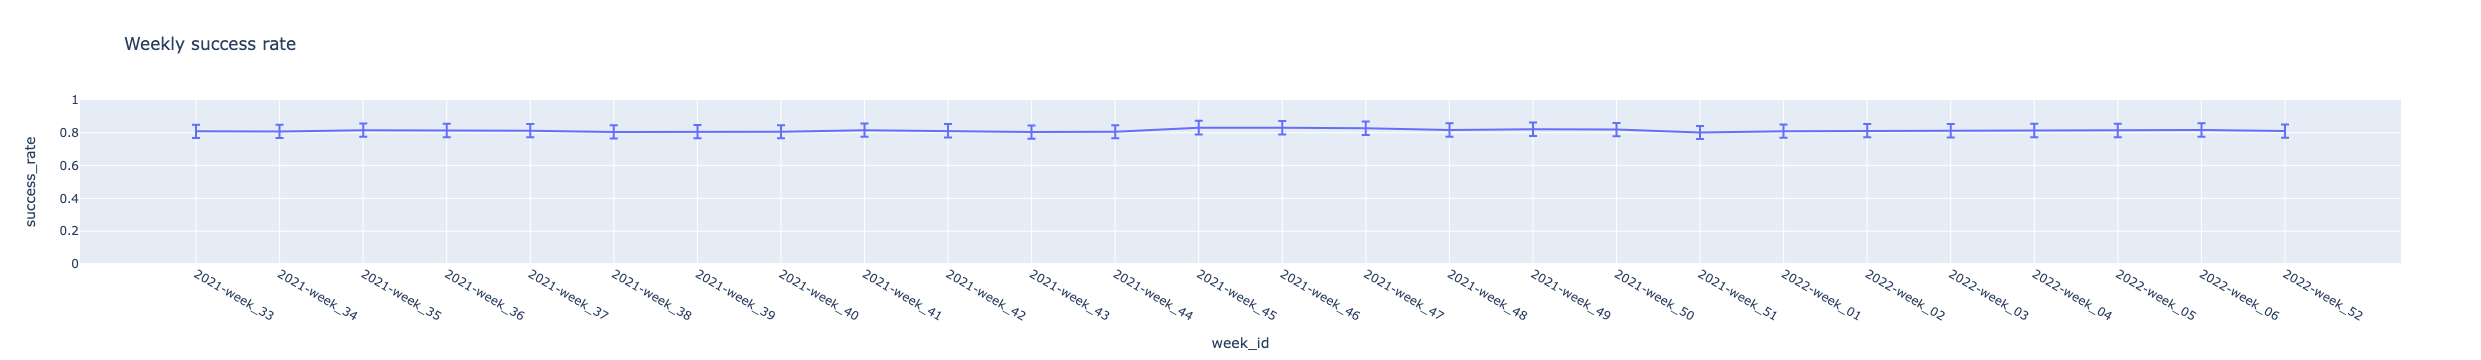

In [9]:
px.line(succes_rate_per_week, x='week_id',y='success_rate', error_y='success_rate_ci', range_y=(0,1), title='Weekly success rate')

### Adding facets/colors

Facets and colors allows to present data from multiple groups on the same graph or as subplots in an easy and convient way. For example, let's calculate the weekly success rate **per region**:


In [10]:
reginal_succes_rate_per_week = ad_recs_annotated.groupby(['week_id','region']).apply(calc_success_rate)
reginal_succes_rate_per_week = reginal_succes_rate_per_week.reset_index().sort_values(by='week_id')
reginal_succes_rate_per_week.head()

week_id region  success_rate  success_rate_ci
0  2021-week_33     DE      0.805846         0.040292
1  2021-week_33     GB      0.849686         0.042484
2  2021-week_33     IN      0.732478         0.036624
3  2021-week_33     JP      0.690875         0.034544
4  2021-week_33     US      0.887771         0.044389

Notice the **region** column. Using the addition of only one parameter, we can split the non-region weekly success rate into a region-specific success rate on the same axis:

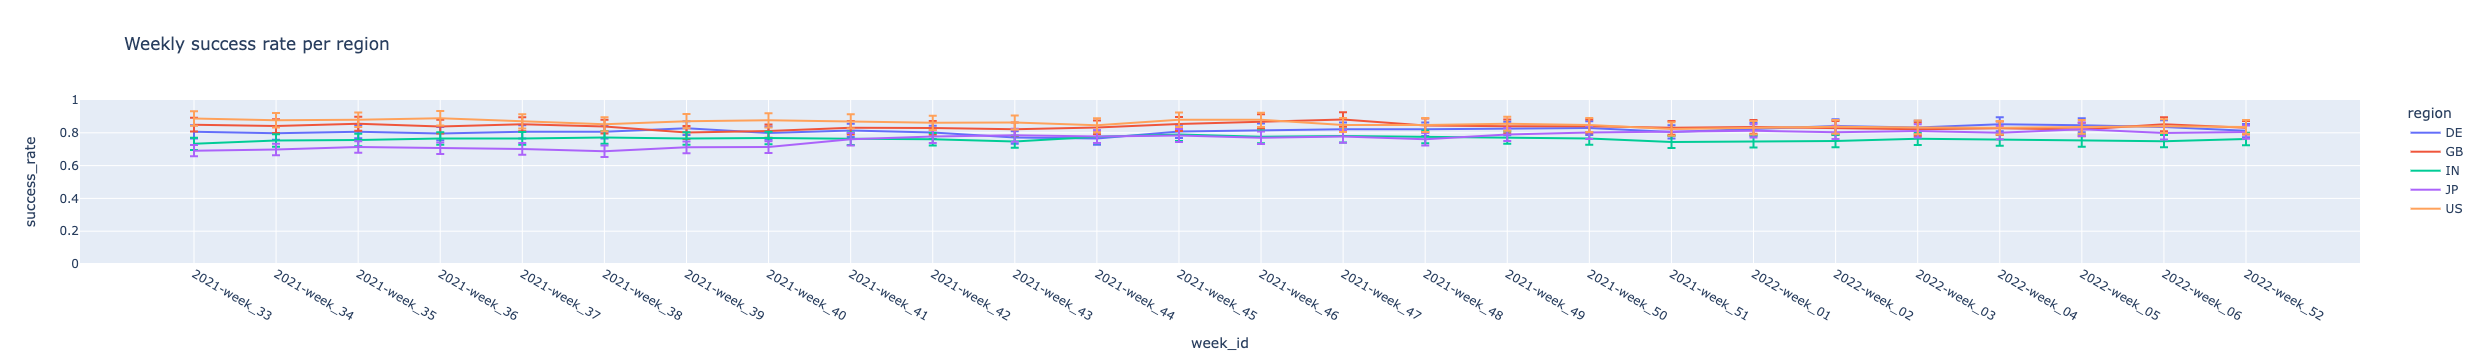

In [11]:
px.line(reginal_succes_rate_per_week, x='week_id',y='success_rate', error_y='success_rate_ci', range_y=(0,1), color='region', 
        title='Weekly success rate per region')

To seperate the graphs into different colmuns, use the `facet_col` param instead of the `color` param:

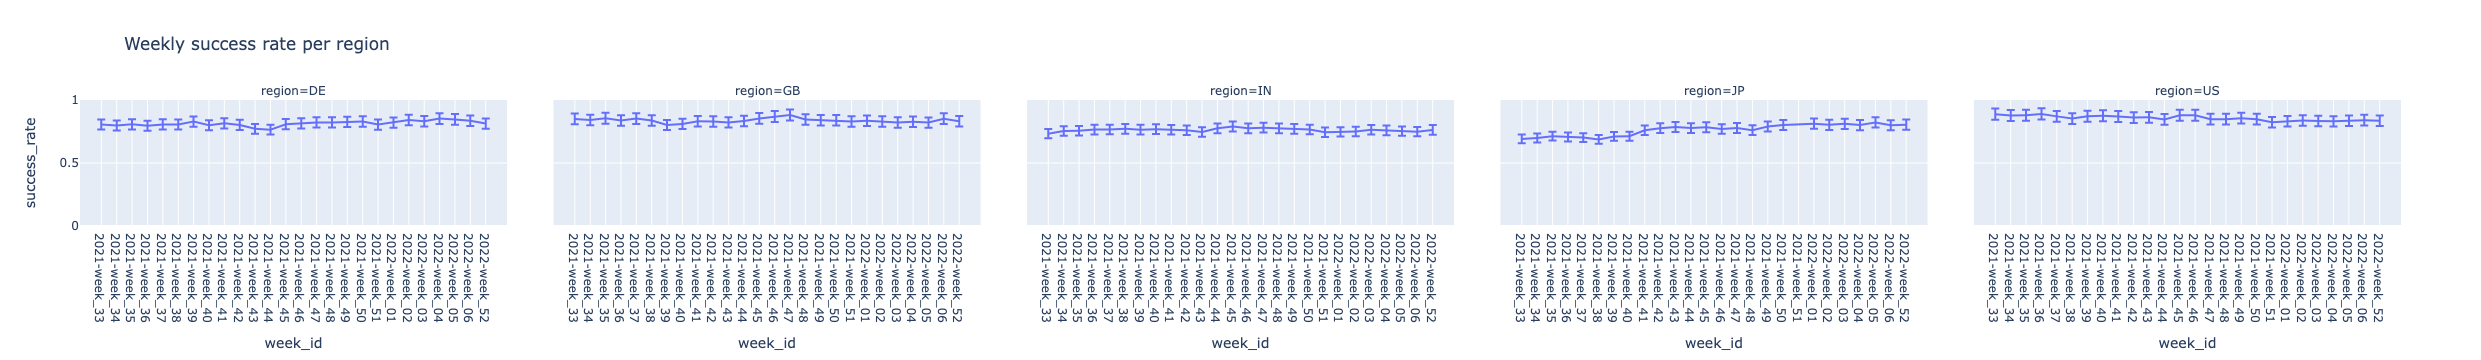

In [12]:
px.line(reginal_succes_rate_per_week, x='week_id',y='success_rate', error_y='success_rate_ci', range_y=(0,1), facet_col='region', 
        title='Weekly success rate per region', )

## Bar charts

To examplify the usage of bar charts on our data, let's write a helper function that calculate requests proportion by a client/provider or other dimension:

In [13]:
from src.helpers import calc_requests_proportion_by_dimension

In [14]:
weekly_requests_counts_and_props = calc_requests_proportion_by_dimension(ad_recs_annotated, 'week_id').reset_index()
weekly_requests_counts_and_props.head()

week_id  request_counts  reqeust_proportions
0  2021-week_33           14356             0.038407
1  2021-week_34           14371             0.038447
2  2021-week_35           14373             0.038452
3  2021-week_36           14390             0.038498
4  2021-week_37           14392             0.038503

### Simple bar charts

We will use plotly express `bar()` API to plot line graphs. As in the line case, we just supply the dataframe, the column to be used as the x axis and the column to be used as the y axis:

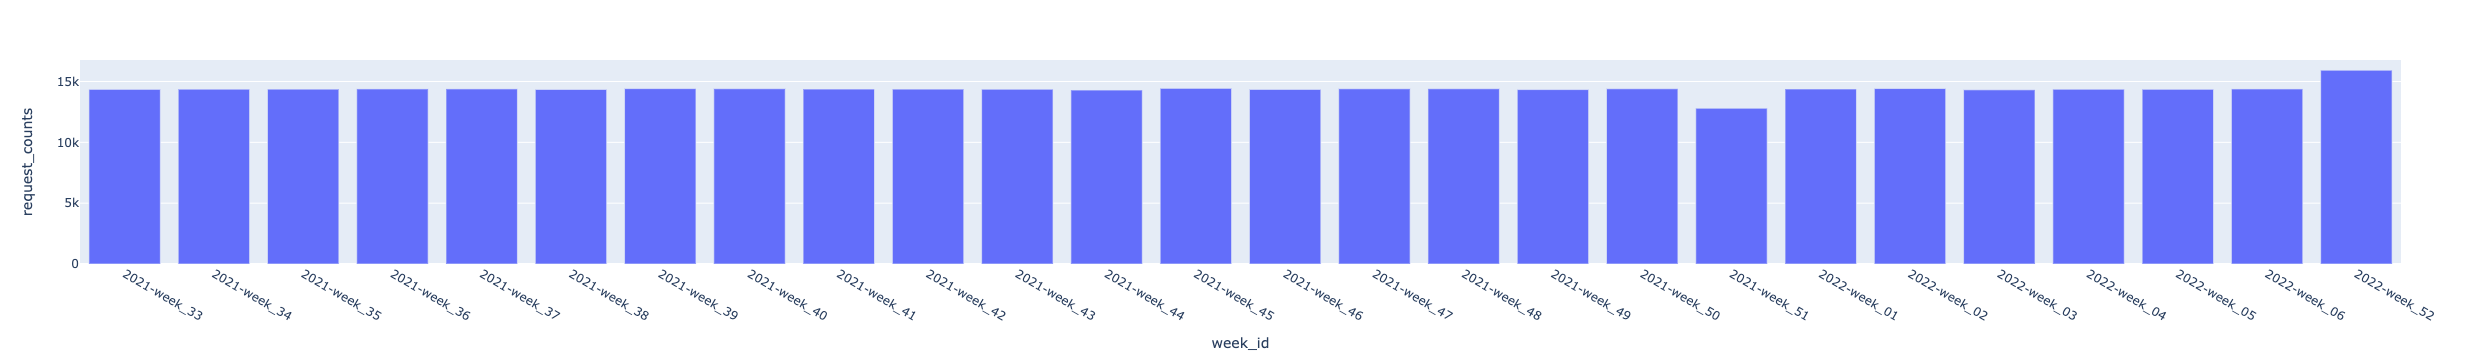

In [15]:
px.bar(weekly_requests_counts_and_props, x='week_id', y='request_counts')

As before, we can add title and modify the graph visuals to our liking by the pre-defined params of the API:

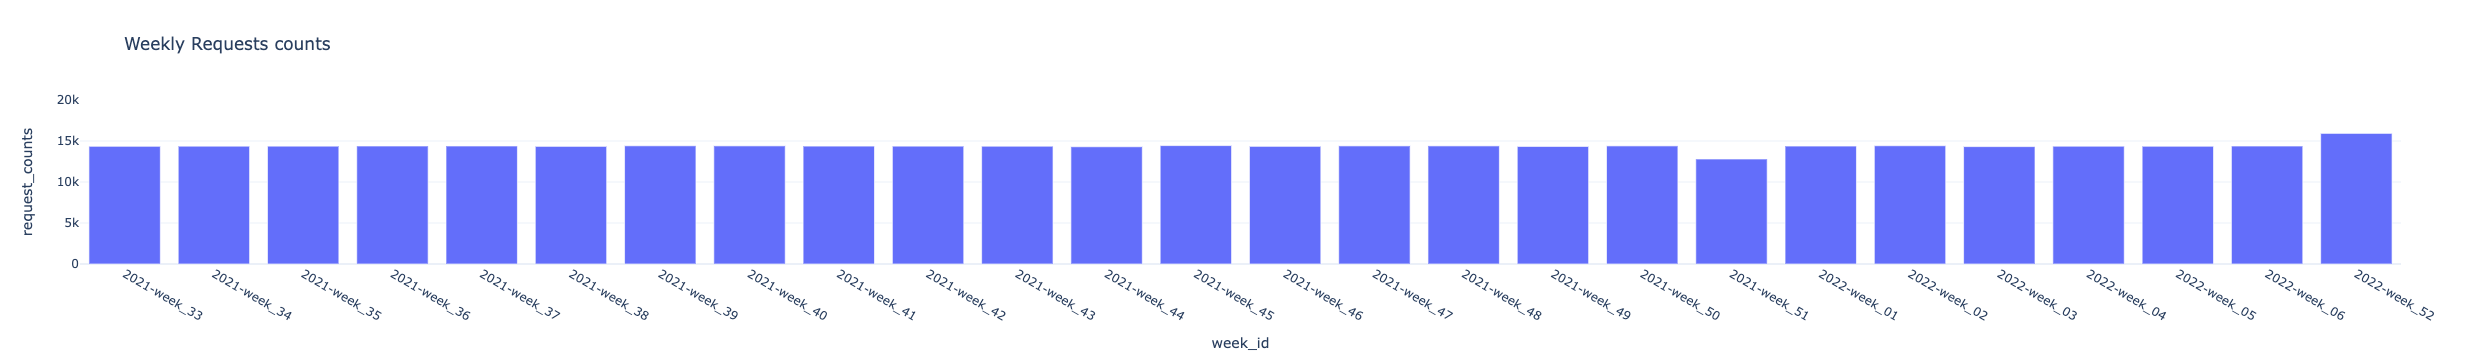

In [16]:
px.bar(weekly_requests_counts_and_props, x='week_id', y='request_counts', template='plotly_white', range_y=(0, 20000), title='Weekly Requests counts')

### Sophisticated bar charts

Again, we can construct a bar charts to hold a lot of information in one chart. For example, say we want the number of weekly requests in different breakdowns (requester, ad provider etc.)

In [17]:
weekly_requests_counts_and_props_by_rec_provider = ad_recs_annotated.groupby('week_id').apply(lambda grp: calc_requests_proportion_by_dimension(grp, 'rec_provider')).reset_index()
weekly_requests_counts_and_props_by_rec_provider.head()

week_id rec_provider  request_counts  reqeust_proportions
0  2021-week_33       BooksQ             114             0.007941
1  2021-week_33       BooksY             184             0.012817
2  2021-week_33         DNNQ            4915             0.342366
3  2021-week_33         DNNY            1222             0.085121
4  2021-week_33      ManualQ             746             0.051964

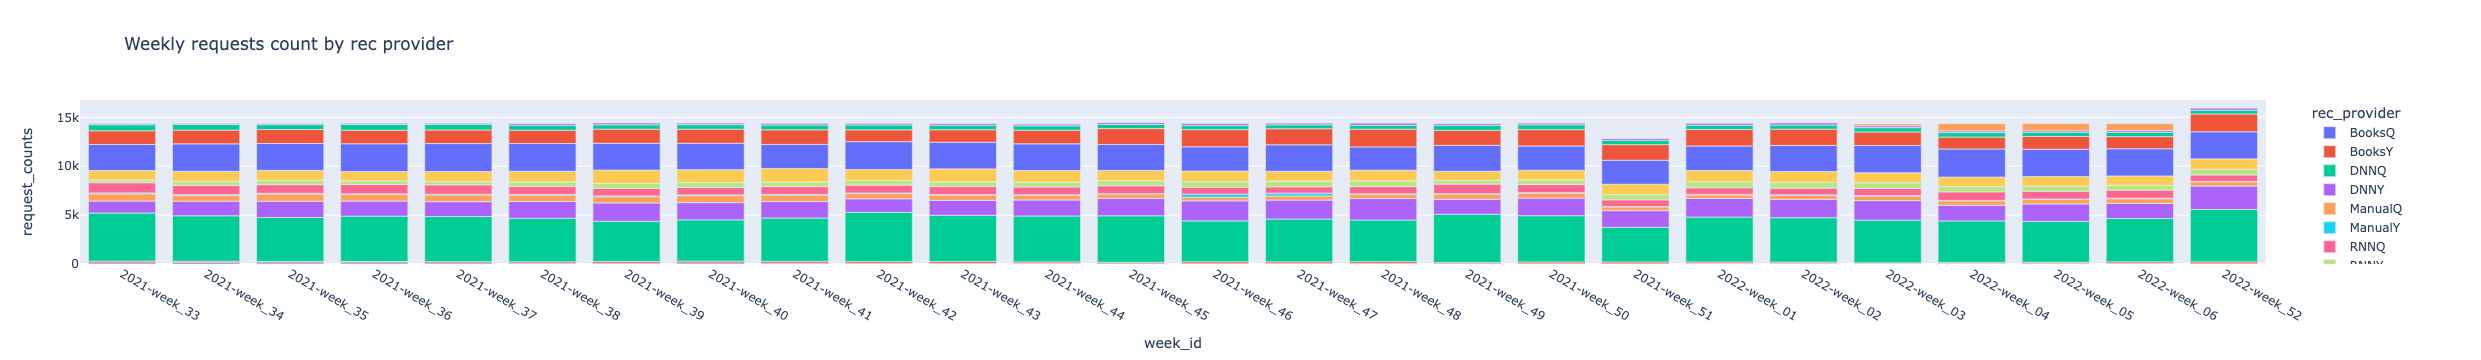

In [18]:
px.bar(weekly_requests_counts_and_props_by_rec_provider, x='week_id',y='request_counts', color='rec_provider', title='Weekly requests count by rec provider')

### More plots modifications

plotly express returns a `Figure` object. A figure object is composed of a `data` component and a `Layout` component. We can modify those to pin-point our graph visuals. For example, some of you OCDs might be annoyed by the non-centered title... let's fix that :)

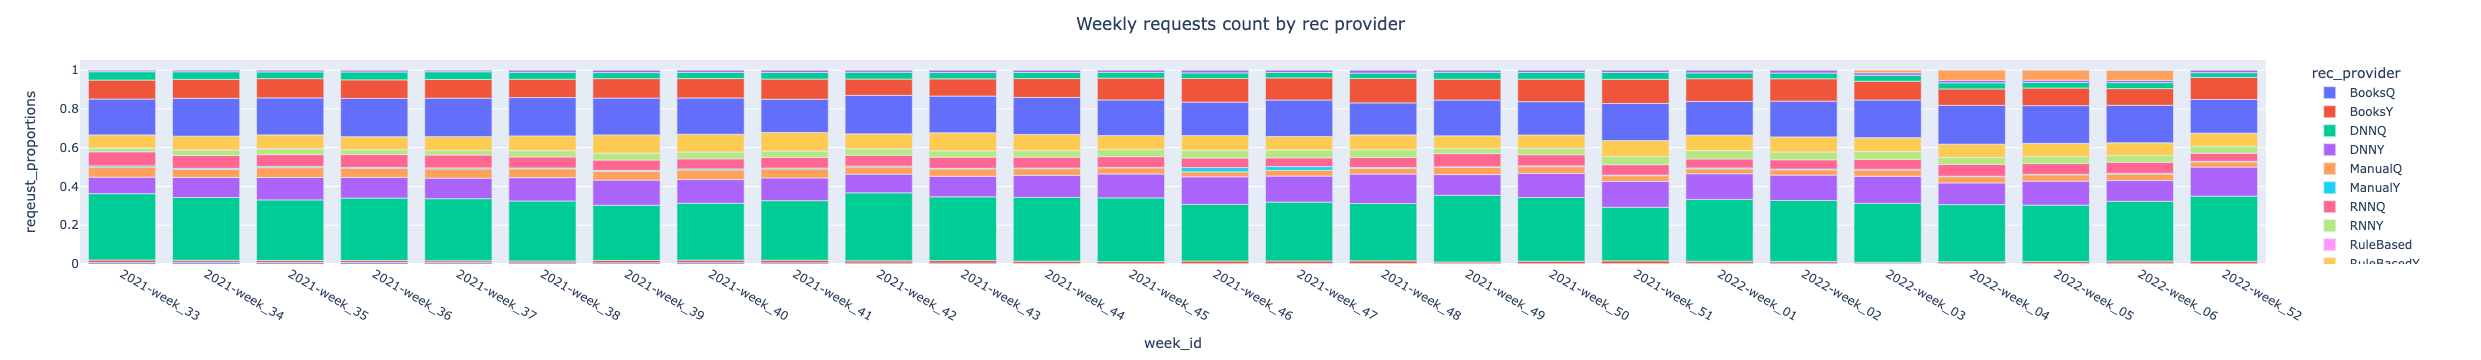

In [31]:
fig = px.bar(weekly_requests_counts_and_props_by_rec_provider, x='week_id',y='reqeust_proportions', color='rec_provider')
fig.update_layout(title_text='Weekly requests count by rec provider', title_x=0.5)

In [32]:
fig.layout

Layout({
    'barmode': 'relative',
    'legend': {'title': {'text': 'rec_provider'}, 'tracegroupgap': 0},
    'margin': {'t': 60},
    'template': '...',
    'title': {'text': 'Weekly requests count by rec provider', 'x': 0.5},
    'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'week_id'}},
    'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'reqeust_proportions'}}
})

In [33]:
fig.data[0]

Bar({
    'alignmentgroup': 'True',
    'hovertemplate': 'rec_provider=BooksQ<br>week_id=%{x}<br>reqeust_proportions=%{y}<extra></extra>',
    'legendgroup': 'BooksQ',
    'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
    'name': 'BooksQ',
    'offsetgroup': 'BooksQ',
    'orientation': 'v',
    'showlegend': True,
    'textposition': 'auto',
    'x': [2021-week_33, 2021-week_34, 2021-week_35, 2021-week_36, 2021-week_37,
          2021-week_38, 2021-week_39, 2021-week_40, 2021-week_41, 2021-week_42,
          2021-week_43, 2021-week_44, 2021-week_45, 2021-week_46, 2021-week_47,
          2021-week_48, 2021-week_49, 2021-week_50, 2021-week_51, 2022-week_01,
          2022-week_02, 2022-week_03, 2022-week_04, 2022-week_05, 2022-week_06,
          2022-week_52],
    'xaxis': 'x',
    'y': array([0.00794093, 0.00925475, 0.00814026, 0.0086171 , 0.00708727, 0.00620339,
                0.00610433, 0.0071498 , 0.00618915, 0.00479967, 0.00473307, 0.00356668,
                0.001731

## Scatter plots

Perhaps the most important type of graph for data scientist. Here we can observe pure data with enormous visualization power! Let's load the famouse Iris dataset to demonstrate:

In [22]:
import plotly.express as px
df = px.data.iris()
df.head()

sepal_length  sepal_width  petal_length  petal_width species  species_id
0           5.1          3.5           1.4          0.2  setosa           1
1           4.9          3.0           1.4          0.2  setosa           1
2           4.7          3.2           1.3          0.2  setosa           1
3           4.6          3.1           1.5          0.2  setosa           1
4           5.0          3.6           1.4          0.2  setosa           1

### A simple scatter plot

We will use plotly express `scatter()` API to plot line graphs. As in the line case, we just supply the dataframe, the column to be used as the x axis and the column to be used as the y axis.

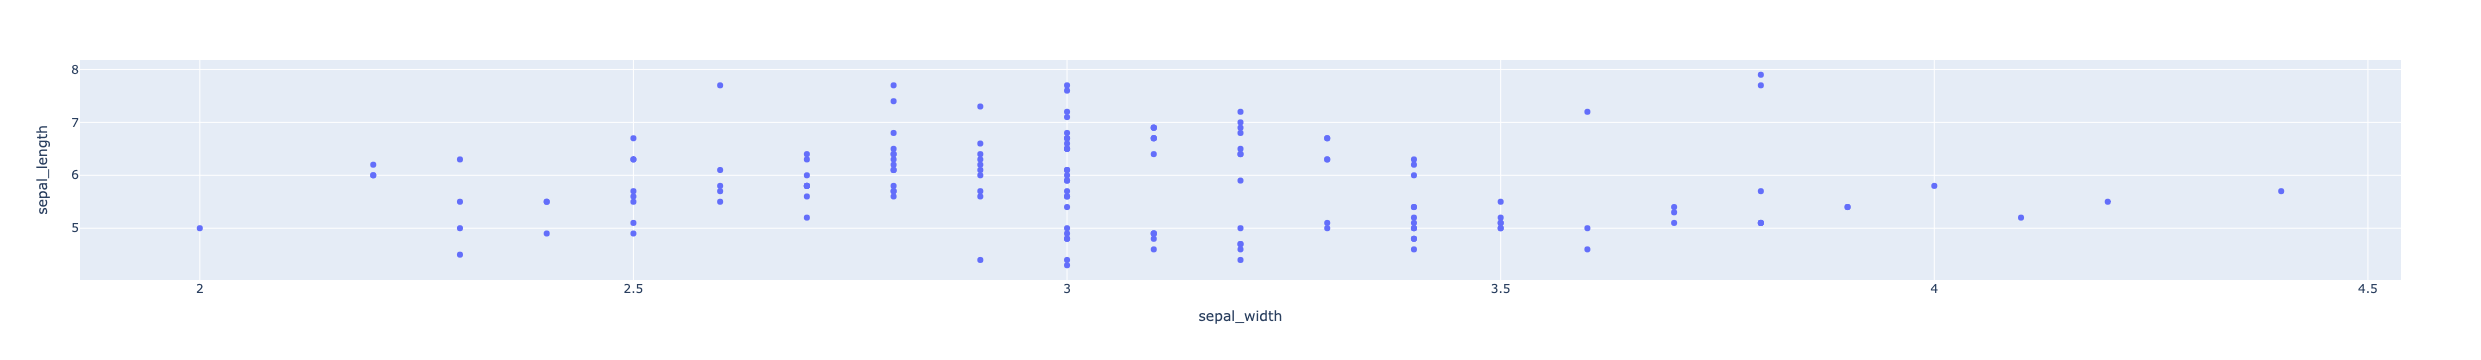

In [23]:
px.scatter(df, x="sepal_width", y="sepal_length")

### Sophisticated scatter plots:

As before, If a `color` column is supplied, each group will have a different colors :

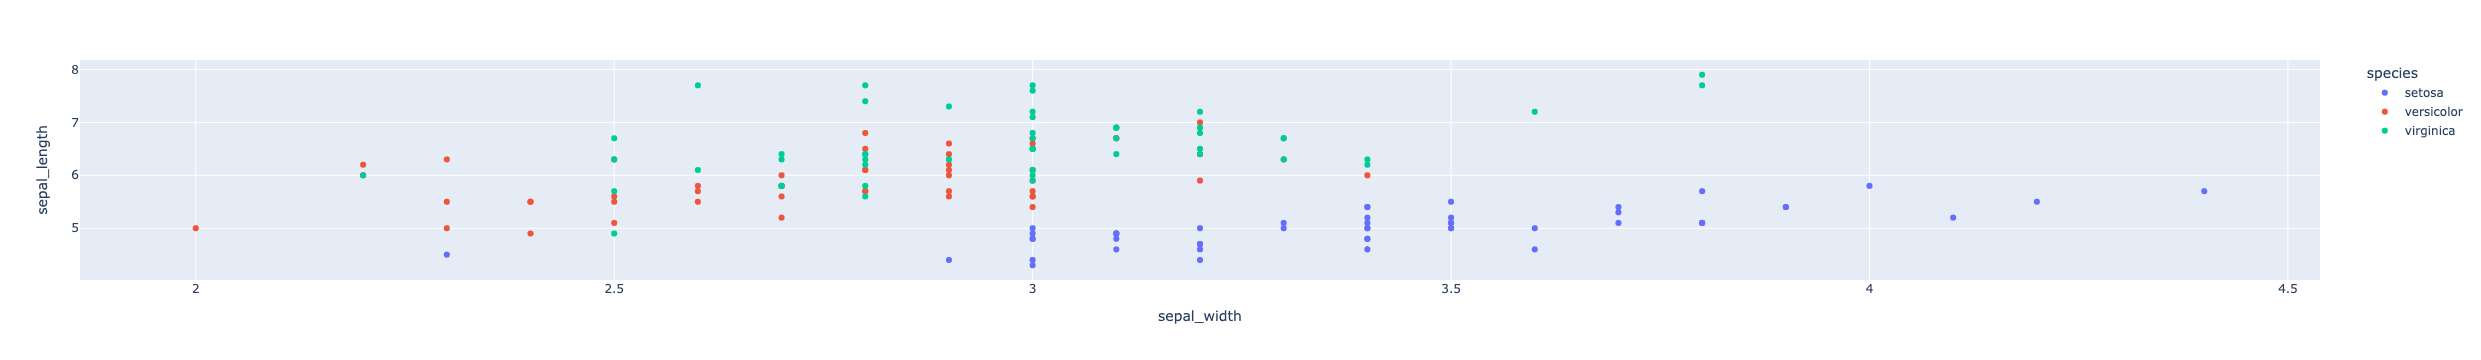

In [24]:
px.scatter(df, x="sepal_width", y="sepal_length", color="species")

Now let's make it even more informative, and more beautiful by adding a regression line (Ordinery least squars AKA OLS) and changing the background to white:

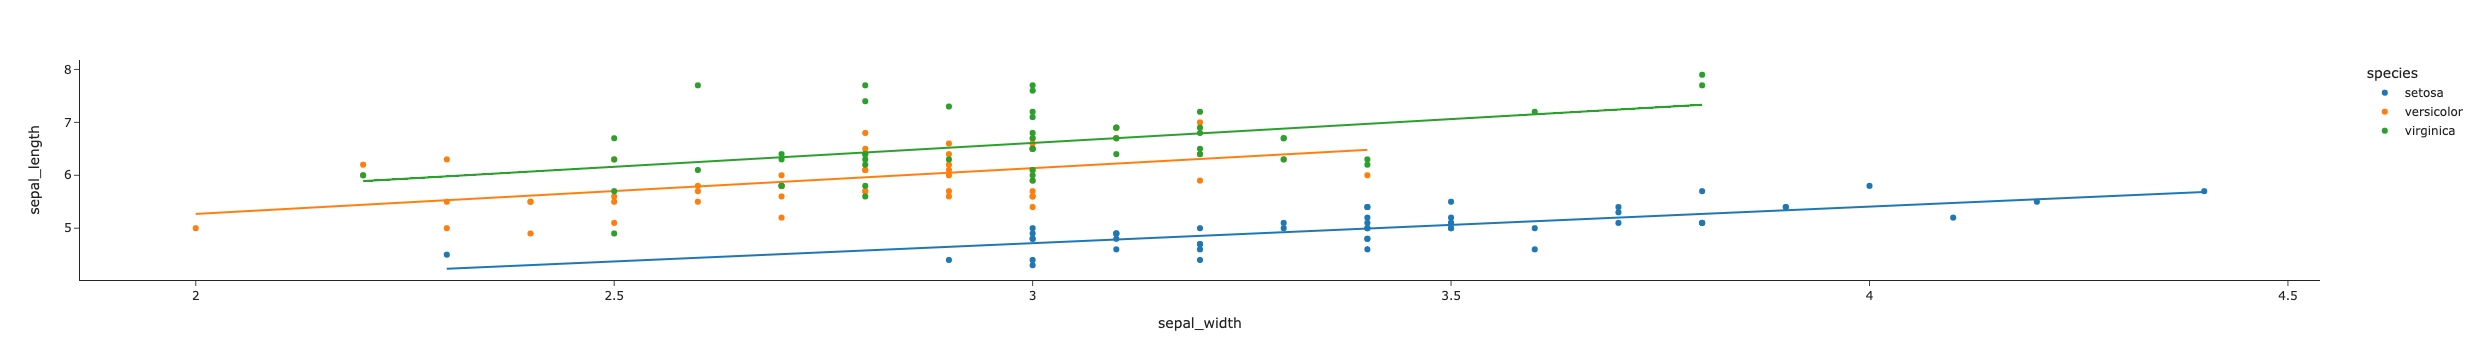

In [25]:
px.scatter(df, x="sepal_width", y="sepal_length", color="species", trendline="ols", template="simple_white")

Let's see the marginal distributions as well, and make the plot higher:

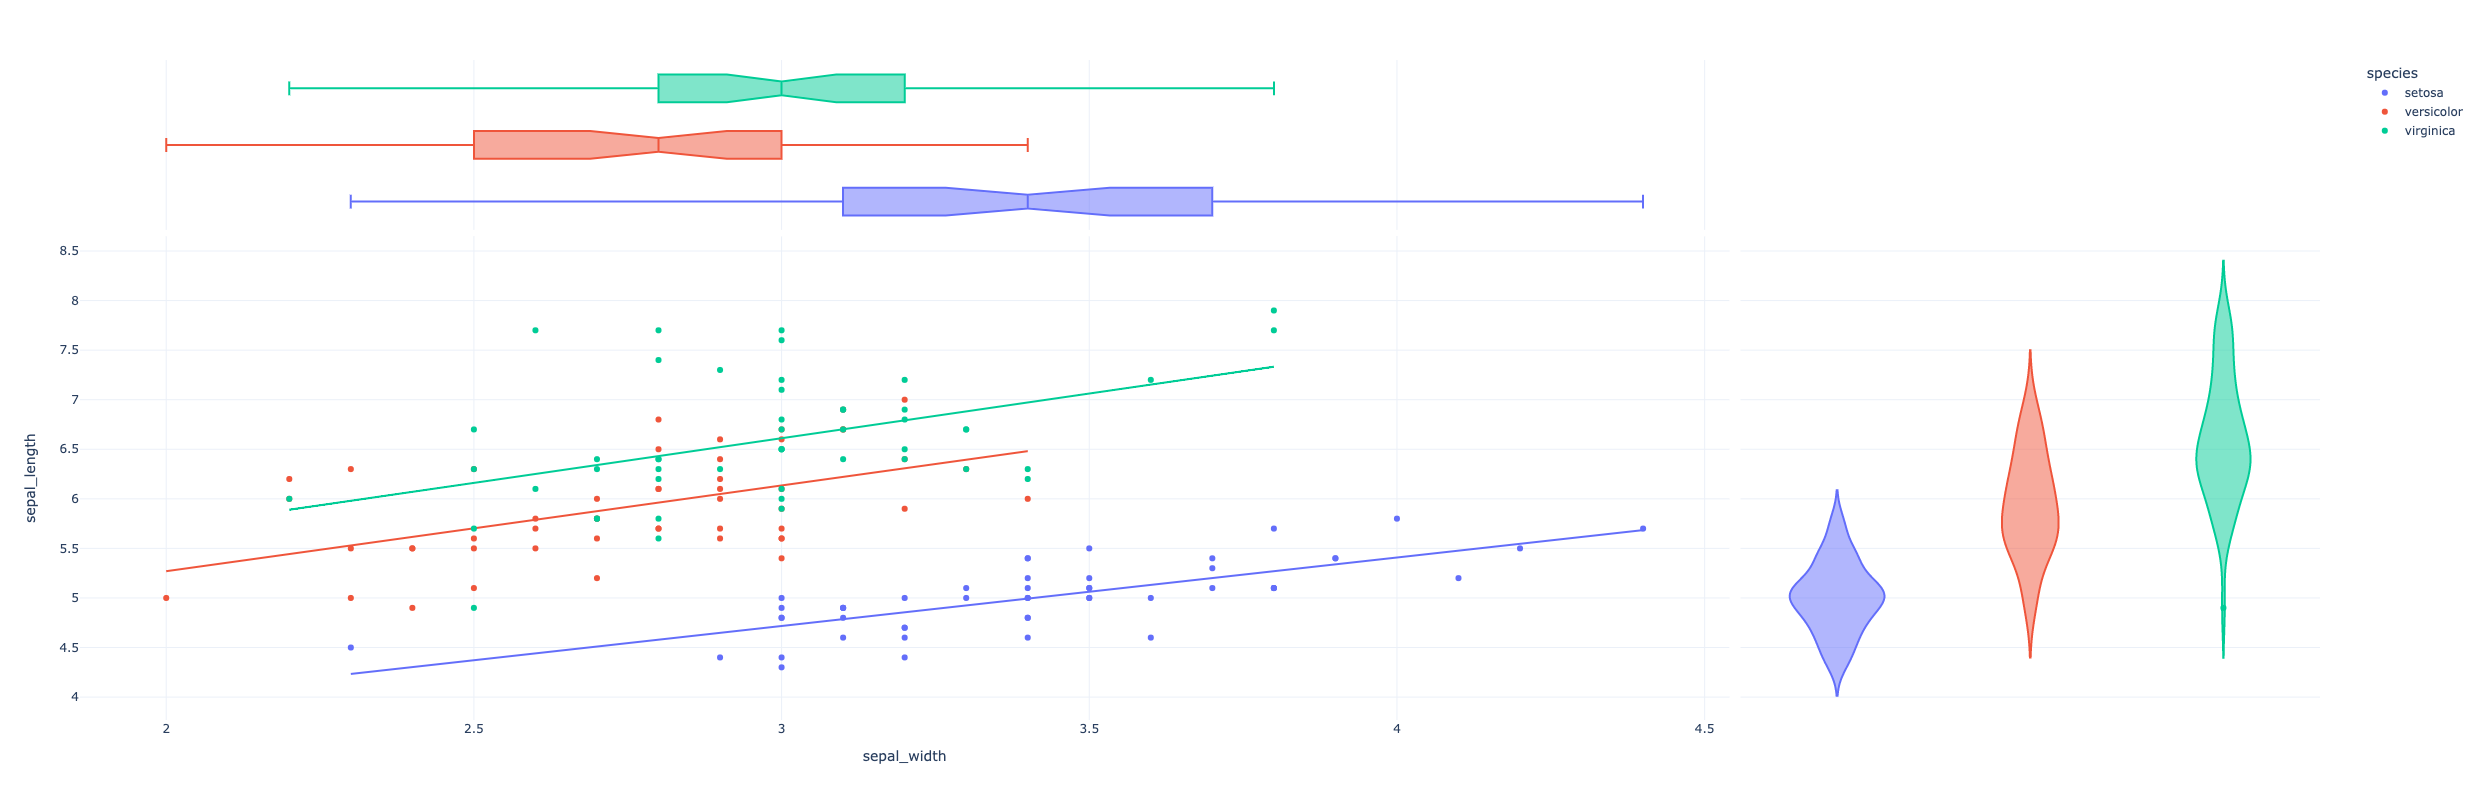

In [26]:
px.scatter(df, x="sepal_width", y="sepal_length", color="species", marginal_y="violin", marginal_x="box", trendline="ols", template="plotly_white", height=800)

Scatter matrix is a good way to observe interations between features:

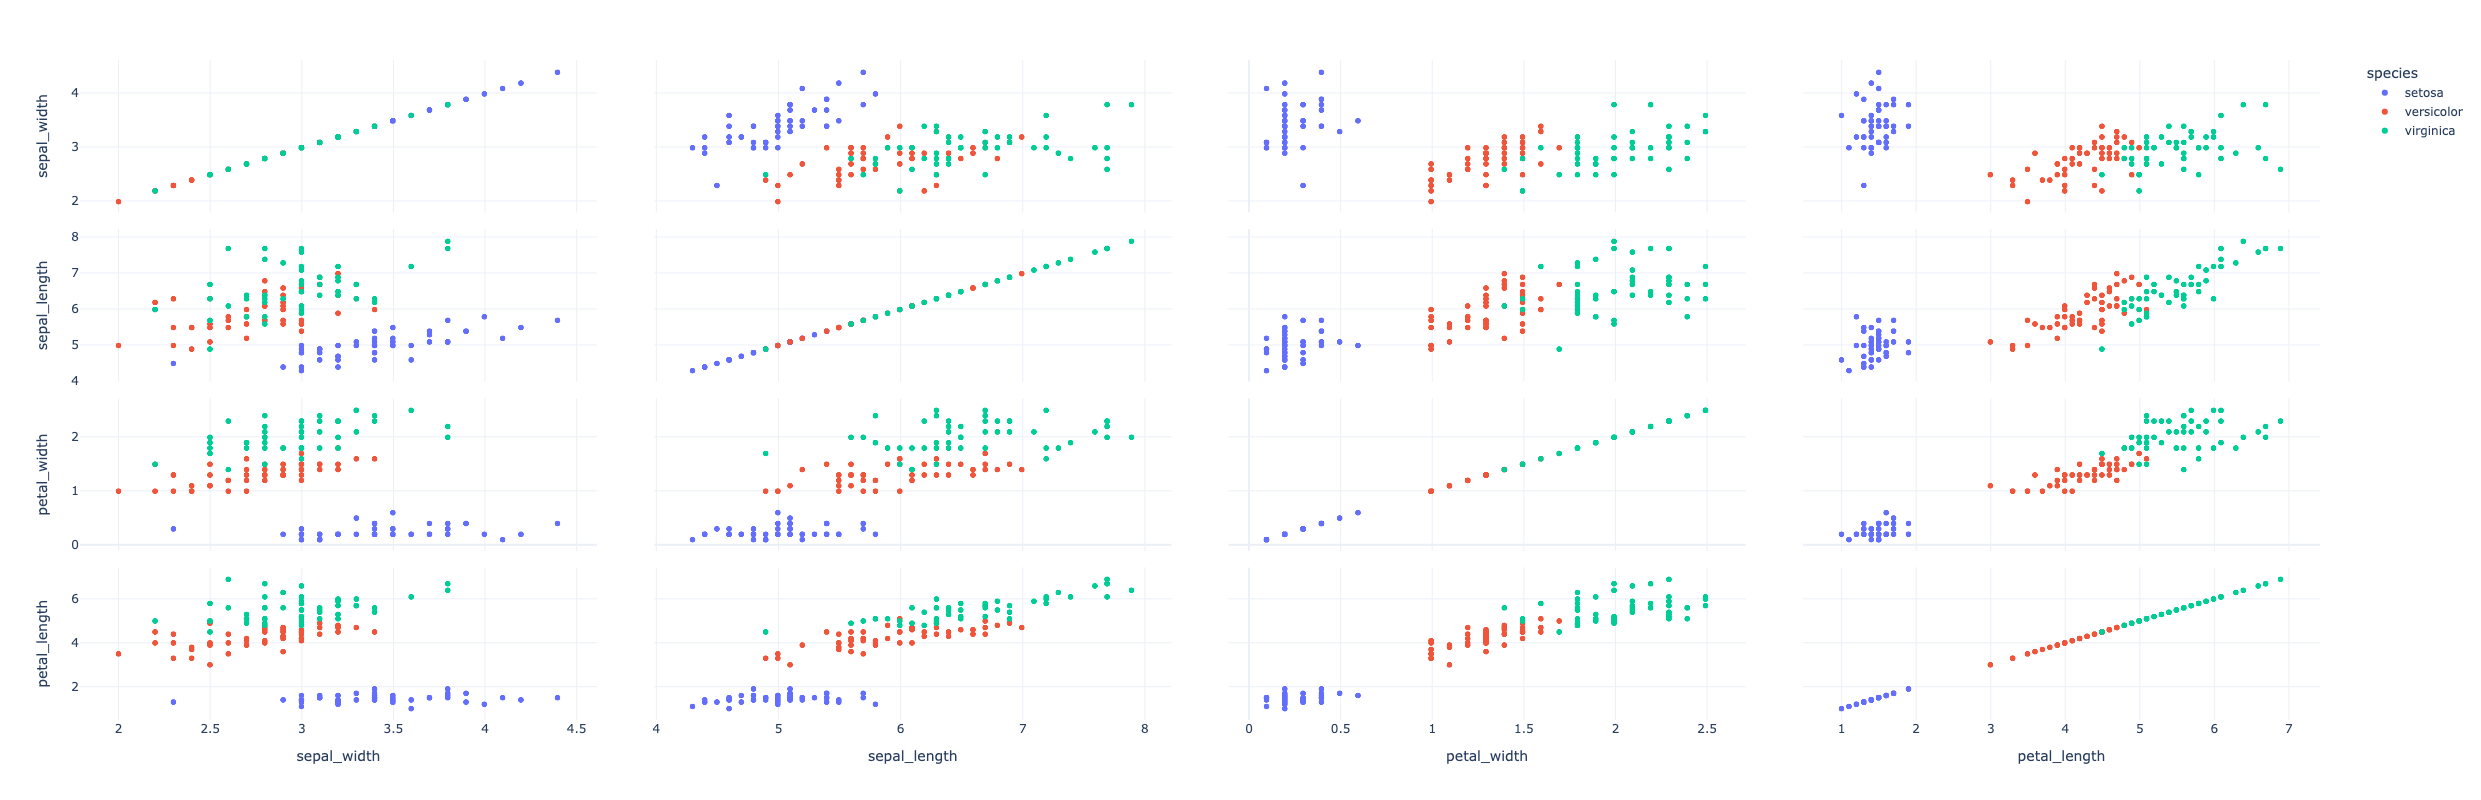

In [27]:
fig = px.scatter_matrix(df, dimensions=["sepal_width", "sepal_length", "petal_width", "petal_length"], color="species", template="plotly_white", height=800)
fig.show()

## Saving Plots

Interactive plots can be saved and shared via HTML. You can save a plot to HTML and have it interactivly available in any browser:

In [28]:
fig.write_html('./scatter_matrix.html')

Also available:
* `write_json()`
* `write_image()`

## Dashboarding

Dashboarding is an amazing tool for effective and even more interactive data exploration. Instead of plotting multiple plots, one-by-one, making a very heavy notebook, we can explore the data using one plot with the help of widgets:

In [34]:
import ipywidgets as widgets

In [36]:
@widgets.interact
def show_success_rate_by_region(regin=ad_recs_annotated.region.unique()):
    pass

interactive(children=(Dropdown(description='regin', options=('DE', 'GB', 'IN', 'JP', 'US'), value='DE'), Outpu…

In [50]:
@widgets.interact
def show_success_rate_by_region(region=ad_recs_annotated.region.unique()):
    data = reginal_succes_rate_per_week[reginal_succes_rate_per_week.region == region]
    fig = px.line(data, x='week_id',y='success_rate', error_y='success_rate_ci', range_y=(0,1), template='plotly_white')
    fig.update_layout(title_text= f' {region} Weekly success rate per region', title_x=0.5)
    return fig

interactive(children=(Dropdown(description='region', options=('DE', 'GB', 'IN', 'JP', 'US'), value='DE'), Outp…

We can improve by setting our own input widgets, for example instead of using a drop-down, let's use a multi-select widget:

In [51]:
region_multi_select = widgets.SelectMultiple(options=ad_recs_annotated.region.unique())
region_multi_select

SelectMultiple(options=('DE', 'GB', 'IN', 'JP', 'US'), value=())

In [52]:
@widgets.interact
def show_success_rate_by_region(regions = region_multi_select):
    data = reginal_succes_rate_per_week[reginal_succes_rate_per_week.region.isin(regions)]
    fig = px.line(data, x='week_id',y='success_rate', error_y='success_rate_ci', range_y=(0,1), color='region', template='plotly_white')
    fig.update_layout(title_text= f' {", ".join(regions)} Weekly success rate', title_x=0.5)
    return fig

interactive(children=(SelectMultiple(description='regions', options=('DE', 'GB', 'IN', 'JP', 'US'), value=()),…

Dashboarding is an advance method for data exploation, data visualization, story telling and changes tracking. Read more about it here:
* https://ipywidgets.readthedocs.io/en/latest/
* https://dash.plotly.com/
* https://www.the-analytics.club/plotly-dashboards-in-python/
* https://towardsdatascience.com/creating-a-better-dashboard-with-python-dash-and-plotly-80dfb4269882